In [ ]:
Team members:
Xi Li
Yulei Sun
Hsiao Yuan Wang
Hongming Zhang

## Data Model

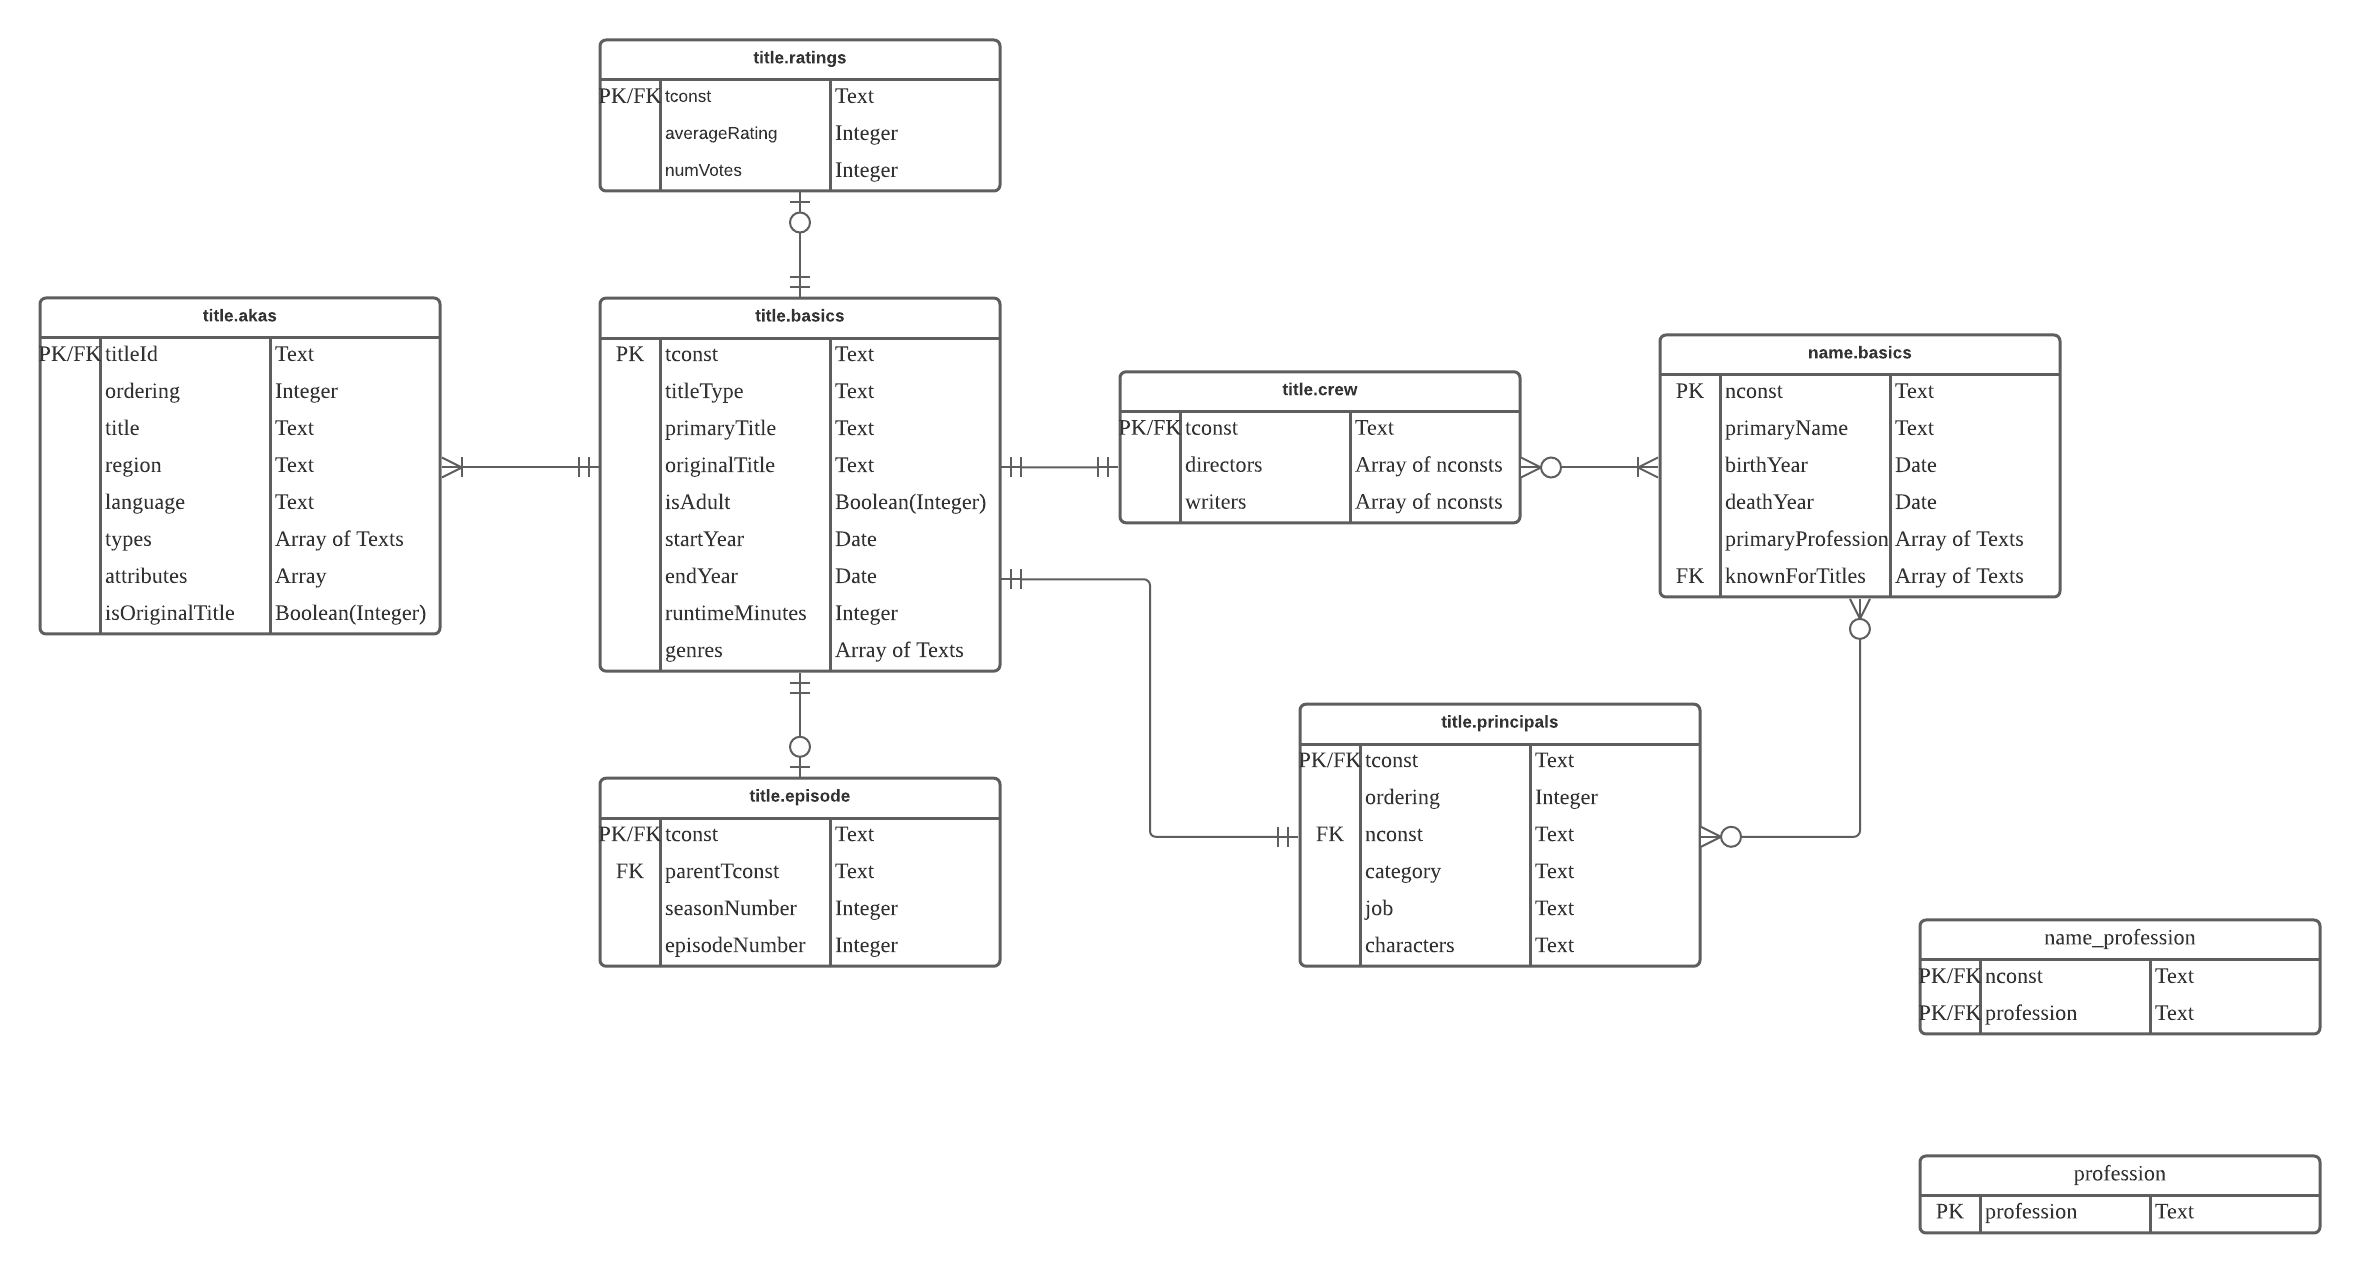

In [1]:
"""
2A: ERD of the original data
"""
from IPython.display import Image
Image("ERD.png")

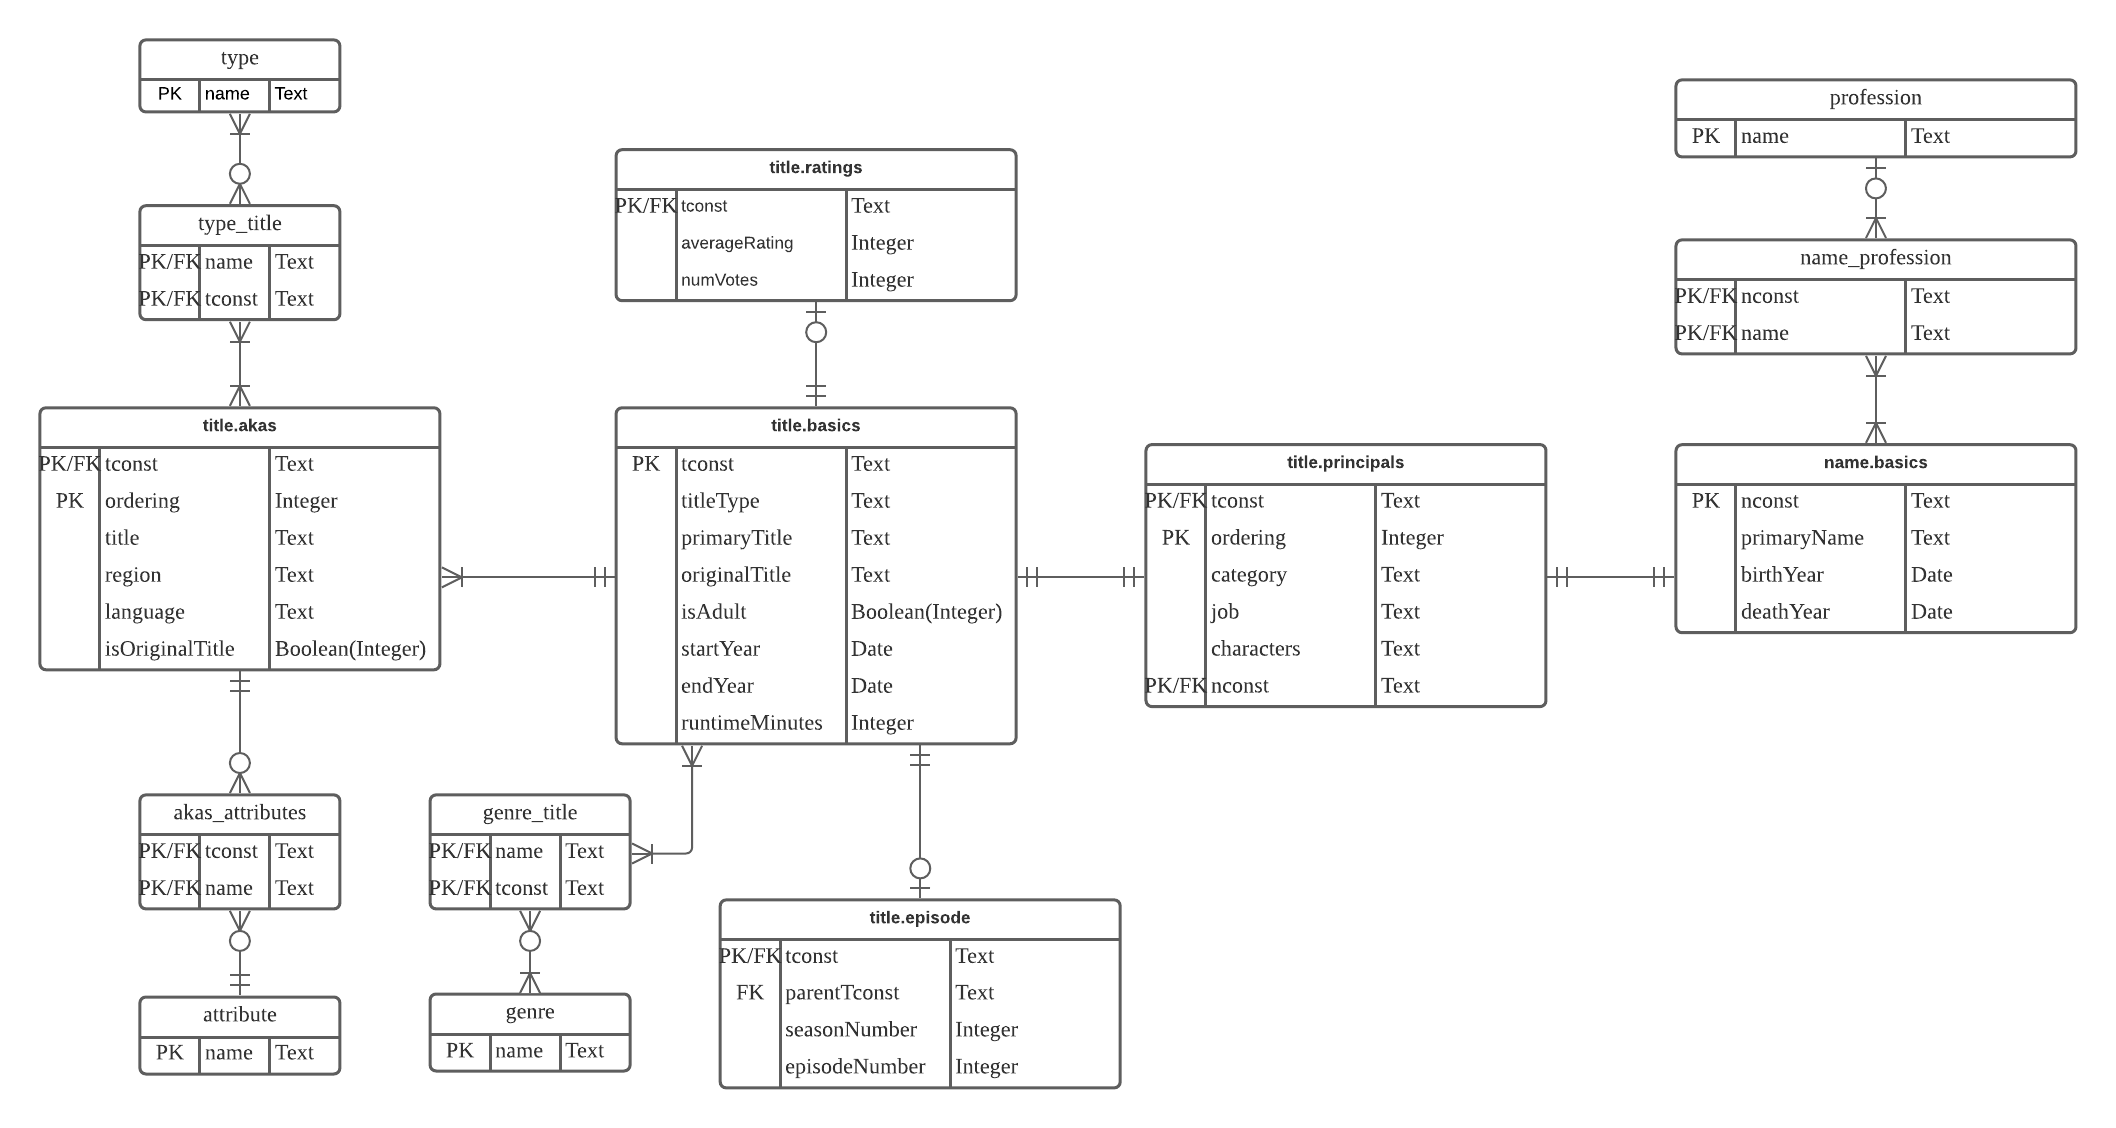

In [20]:
"""
2B: ERD after normalizing to BCNF
"""
Image("ERD_normalized.png")

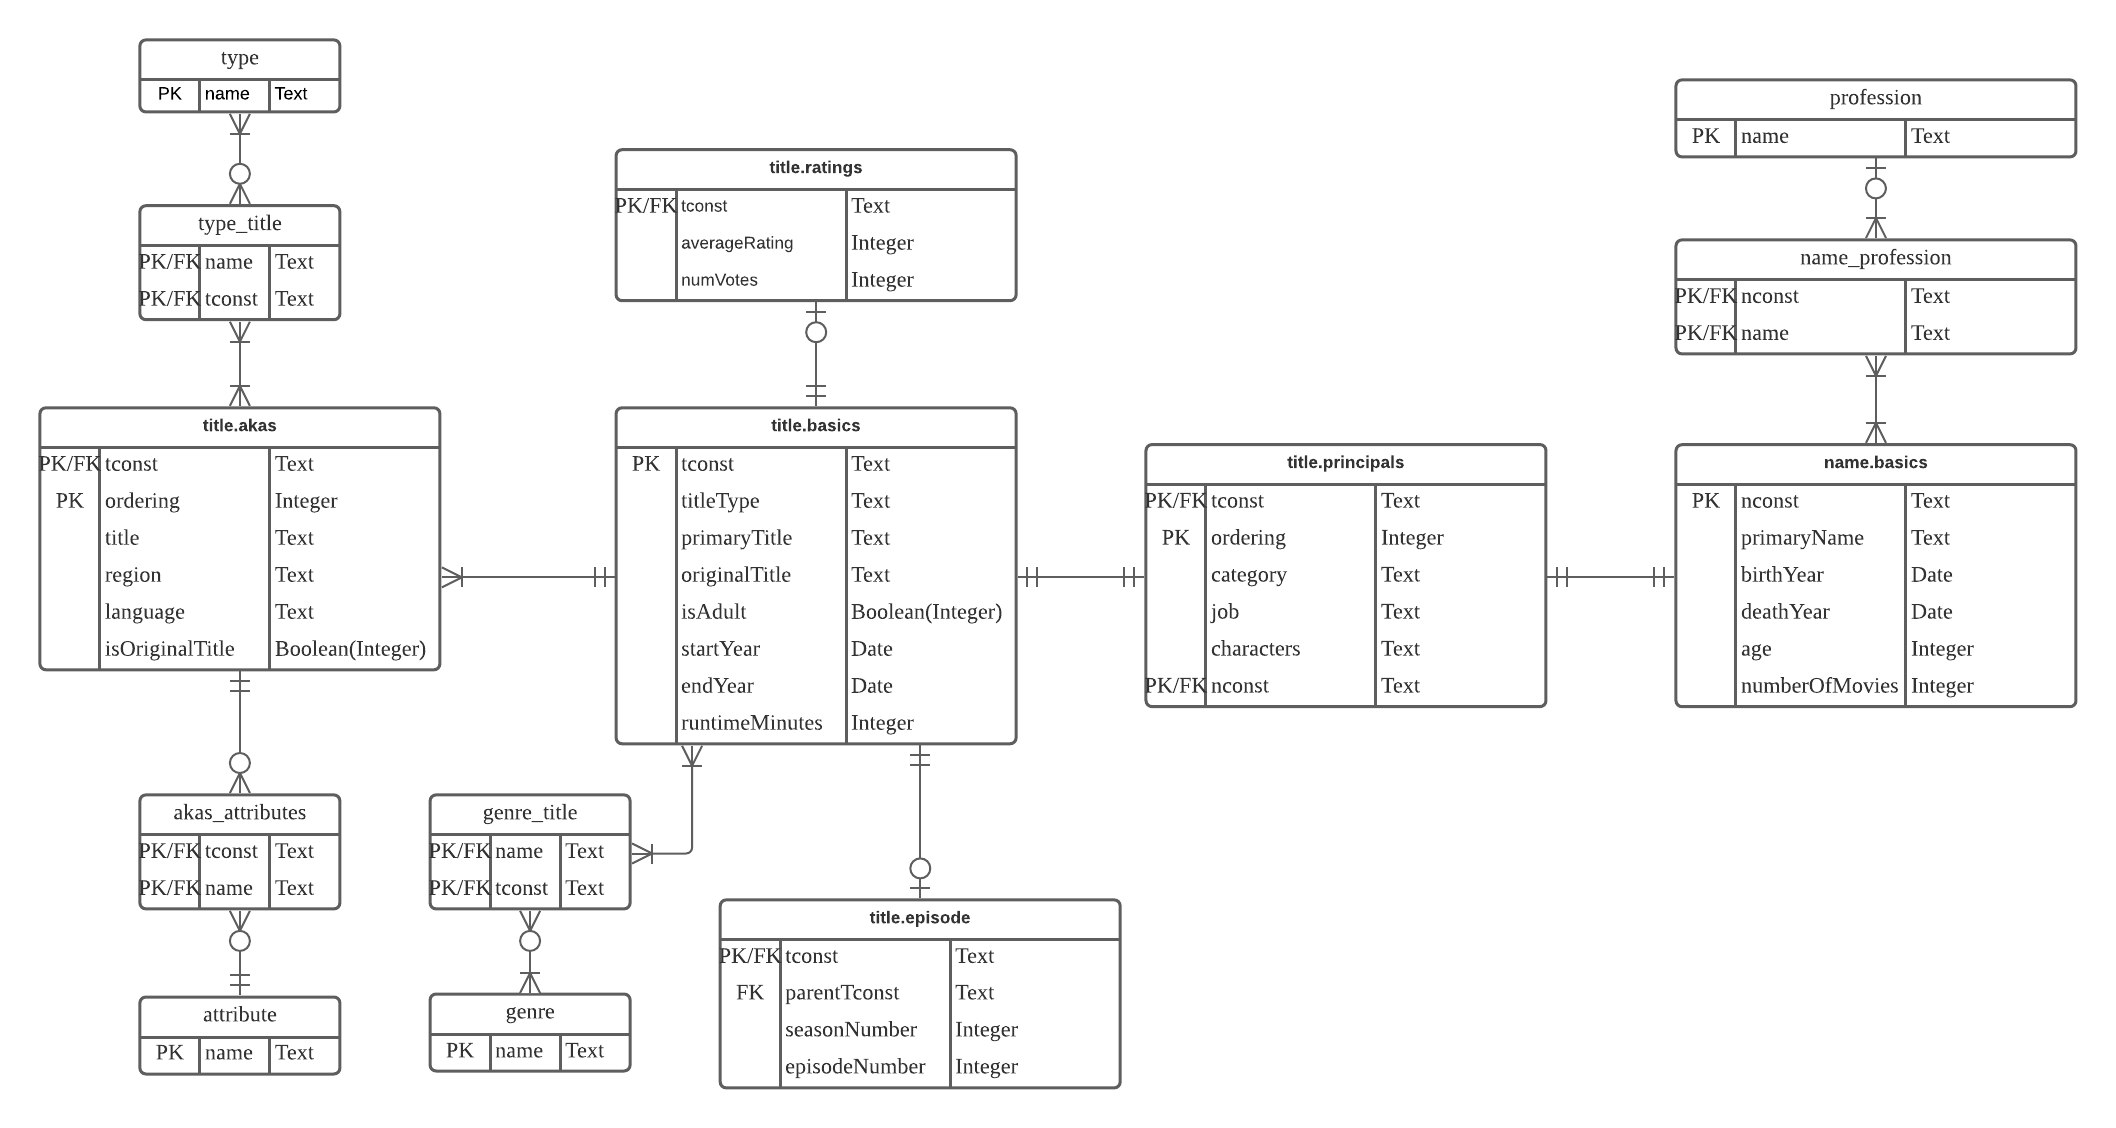

In [3]:
"""
2C: ERD after adding age and numberOfMovies attributes
"""
Image("2CD.png")

2C: Why would someone choose to denormalize data as done in 2C?

We denormalized the newly added "age" and "numberOfMovies" attributes in 2C because it increases performance of our database.
These two attributes are closely related to each row of the table "name.basics" since they are part of the information of each person. Thus, denormalizing them increases the read performance when we want to fetch information related to each person, because we no longer need to join multiple tables (internally running loops) just to figure out the age of a given person. Moreover, it also reduces the complexity of such operations, because it's more natural for database users to think that a person's age and number of movie appearances should be stored on the same row of that person.

## Import Data and Data Parsing

In [4]:
import pandas as pd

"""
Import Data
"""
title_akas_data = pd.read_csv('title.akas.tsv', sep = '\t', nrows = 10000)
title_basic_data = pd.read_csv('title.basics.tsv', sep = '\t', nrows = 10000)
title_ratings_data = pd.read_csv('title.ratings.tsv', sep = '\t', nrows = 10000)
title_episode_data = pd.read_csv('title.episode.tsv', sep = '\t', nrows = 10000)
title_principals_data = pd.read_csv('title.principals.tsv', sep = '\t', nrows = 10000)
name_basics_data = pd.read_csv('name.basics.tsv', sep = '\t', nrows = 10000)
title_crew_data = pd.read_csv('title.crew.tsv', sep = '\t', nrows = 10000)


"""
Data Parsing
"""
# parse type data
type_data_set = set(title_akas_data['types'])
type_data = pd.DataFrame(list(type_data_set), columns = ['name'])

# parse attribute data
attribute_data_set = set(title_akas_data['attributes'])
attribute_data = pd.DataFrame(list(attribute_data_set), columns = ['name'])


# parse genre data
genre_data_raw = title_basic_data['genres']
genre_data_set = set()
for data in genre_data_raw:
    data = str(data).split(",")
    for item in data:
        if item:
            genre_data_set.add(item)
genre_data = pd.DataFrame(list(genre_data_set), columns = ['name'])

# parse title_basic data
title_basics = pd.DataFrame(title_basic_data, columns=['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes'])


# parse title_aka data
title_akas = pd.DataFrame(title_akas_data, columns=['titleId', 'ordering', 'title', 'region', 'language', 'isOriginalTitle'])

# parse title_ratings data
title_ratings = pd.DataFrame(title_ratings_data, columns=['tconst', 'averageRating', 'numVotes'])

# parse title_episode data
title_episode = pd.DataFrame(title_episode_data, columns=['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'])

# parse title_principals data
title_principals = pd.DataFrame(title_principals_data, columns=['tconst', 'ordering', 'category', 'job', 'characters', 'nconst'])

# parse name_basics data
name_basics = pd.DataFrame(name_basics_data, columns=['nconst', 'primaryName', 'birthYear', 'deathYear'])

# parse profession data
profession_data_raw = name_basics_data['primaryProfession']
profession_data_set = set()
for data in profession_data_raw:
    data = str(data).split(",")
    for item in data:
        if item:
            profession_data_set.add(item)
profession_data = pd.DataFrame(list(profession_data_set), columns = ['name'])

# parse type_title data
type_aka_data = pd.DataFrame(title_akas_data, columns=['types', 'titleId']).drop_duplicates()

# parse akas_attribute data
akas_attributes = pd.DataFrame(title_akas_data, columns=['titleId', 'attributes']).drop_duplicates()

# parse genre_title data
genre_title = pd.DataFrame(title_basic_data, columns=['tconst', 'genres']).drop_duplicates()

# parse name_profession data
name_profession = pd.DataFrame(name_basics_data, columns=['nconst', 'primaryProfession']).drop_duplicates()

## Create Table

In [5]:
import sqlite3

""""
Connect with database
"""
con_db = sqlite3.connect('mydb.db')

"""
Create Tables
"""

# Create type table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS type
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS type (
            "name" varchar(255),
            PRIMARY KEY (name)
            );
            ''')
con.close()

# Create attribute table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS attribute
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS attribute(
            name VARCHAR(255),
            PRIMARY KEY (name)
            );
            ''')
con.close()

# create type_title table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS type_title
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS type_title (
            name VARCHAR(255) NOT NULL,
            tconst VARCHAR(255) NOT NULL,
            PRIMARY KEY (name, tconst),
            FOREIGN KEY (name) REFERENCES type(name),
            FOREIGN KEY (tconst) REFERENCES title_akas(tconst)
            );
            ''')
con.close()

# create title_akas table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_akas
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_akas(
            tconst VARCHAR(255),
            ordering INT,
            title VARCHAR(255),
            region VARCHAR(255),
            language VARCHAR(255),
            isOriginalTitle INT,
            PRIMARY KEY (tconst, ordering),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst)
            );
            ''')
con.close()

# create akas_attributes table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS akas_attributes
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS akas_attributes(
            tconst VARCHAR(255),
            name VARCHAR(255),
            PRIMARY KEY (tconst, name),
            FOREIGN KEY (tconst) REFERENCES title_akas(tconst),
            FOREIGN KEY (name) REFERENCES attribute(name)
            );
            ''')
con.close()

# create title_ratings table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_ratings
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_ratings (
            tconst VARCHAR(255),
            averageRating INT,
            numVotes INT,
            PRIMARY KEY (tconst),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst)
            );
            ''')
con.close()

# create title_basics table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_basics
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_basics (
            tconst VARCHAR(255),
            titleType VARCHAR(255),
            primaryTitle VARCHAR(255),
            originalTitle VARCHAR(255),
            isAdult INT,
            startYear VARCHAR(255),
            endYear VARCHAR(255),
            runtimeMinutes INT,
            PRIMARY KEY (tconst)
            );
            ''')
con.close()

# create genre_title table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS genre_title
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS genre_title (
            name VARCHAR(255),
            tconst VARCHAR(255),
            PRIMARY KEY (name, tconst),
            FOREIGN KEY (name) REFERENCES genre(name),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst)
            );
            ''')
con.close()

# create title_episode table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_episode
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_episode(
            tconst VARCHAR(255),
            parentTconst VARCHAR(255),
            seasonNumber INT,
            episodeNumber INT,
            PRIMARY KEY (tconst),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst),
            FOREIGN KEY (parentTconst) REFERENCES title_basics(tconst)
            );
            ''')
con.close()

# create title_principals table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_principals
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_principals (
            tconst VARCHAR(255),
            ordering INT,
            category VARCHAR(255),
            job VARCHAR(255),
            characters VARCHAR(255),
            nconst VARCHAR(255),
            PRIMARY KEY (tconst, ordering),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst)
            FOREIGN KEY (nconst) REFERENCES name_basics(nconst)
            );
            ''')
con.close()

# create title_position table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_position
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_position(
            tconst VARCHAR(255),
            nconst VARCHAR(255),
            isDirector INT,
            isWriter INT,
            PRIMARY KEY (tconst, nconst),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst),
            FOREIGN KEY (nconst) REFERENCES name_basics(nconst)
            );
            ''')
con.close()

# create name_basics table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS name_basics
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS name_basics(
            nconst VARCHAR(255),
            primaryName VARCHAR(255),
            birthYear VARCHAR(255),
            deathYear VARCHAR(255),
            primary KEY (nconst)
            );
            ''')
con.close()

# create principal_name table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS principal_name
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS principal_name(
            nconst VARCHAR(255),
            tconst VARCHAR(255),
            PRIMARY KEY (nconst, tconst),
            FOREIGN KEY (nconst) REFERENCES name_basics(nconst),
            FOREIGN KEY (tconst) REFERENCES title_principals(tconst)
            );
            ''')
con.close()

# create profession table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS profession
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS profession (
            name VARCHAR(255),
            PRIMARY KEY (name)
            );
            ''')
con.close()

# create name_profession table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS name_profession
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS name_profession(
            nconst VARCHAR(255),
            name VARCHAR(255),
            PRIMARY KEY (nconst, name),
            FOREIGN KEY (nconst) REFERENCES name_basics(nconst),
            FOREIGN KEY (name) REFERENCES profession(name)
            );
            ''')
con.close()

# create genre table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS genre
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS genre (
            name VARCHAR(255),
            PRIMARY KEY (name)
            );
            ''')
con.close()

# create title_name table
con = con_db.cursor()
con.execute('''
    DROP TABLE IF EXISTS title_name
''')
con.execute('''
            CREATE TABLE IF NOT EXISTS title_name (
            tconst VARCHAR(255),
            nconst VARCHAR(255),
            PRIMARY KEY (tconst, nconst),
            FOREIGN KEY (tconst) REFERENCES title_basics(tconst),
            FOREIGN KEY (nconst) REFERENCES name_basics(nconst)
            );
            ''')
con.close()





## Insert Data

In [6]:
"""
INSERT data
"""

def insertInto(tableName, data, numCols):
    con = con_db.cursor()
    query = "INSERT INTO " + tableName + " VALUES (" + ",".join("?" * numCols) + " )"
    for idx, row in data.iterrows():
        # print(row)
        con.execute(query, row)
    con.close()

insertInto("type", type_data, 1)
insertInto("attribute", attribute_data, 1)
insertInto("genre", genre_data, 1)
insertInto("title_basics", title_basics, 8)
insertInto("title_akas", title_akas, 6)
insertInto("title_ratings", title_ratings, 3)
insertInto("title_episode", title_episode, 4)
insertInto("title_principals", title_principals, 6)
insertInto("name_basics", name_basics, 4)
insertInto("profession", profession_data, 1)

"""
Insert into type_title
"""
con = con_db.cursor()

query = """
        INSERT OR IGNORE INTO type_title (name, tconst)
        VALUES (?,?) 
        """
for idx, row in type_aka_data.iterrows():
    con.execute(query , row)
con.close()

"""
Insert into akas_attributes
"""
con = con_db.cursor()

query = """
        INSERT OR IGNORE INTO akas_attributes (tconst, name)
        VALUES (?,?) 
        """
for idx, row in akas_attributes.iterrows():
    con.execute(query , row)
con.close()

"""
Insert into genre_title
"""
con = con_db.cursor()

query = """
        INSERT OR IGNORE INTO genre_title (name, tconst)
        VALUES (?,?) 
        """
for idx, row in genre_title.iterrows():
    for genre in str(row[1]).split(','):
        con.execute(query , tuple([row[0],genre]))
con.close()

"""
Insert into name_profession
"""
con = con_db.cursor()

query = """
        INSERT OR IGNORE INTO name_profession (nconst, name)
        VALUES (?,?) 
        """
for idx, row in name_profession.iterrows():
    for name in str(row[1]).split(','):
        con.execute(query , tuple([row[0],name]))
con.close()


In [7]:
"""
Adding two attributes required in 2C
"""

con = con_db.cursor()
con.execute('''
            ALTER TABLE name_basics
            ADD COLUMN age INT;
            ''')
con.execute('''
            ALTER TABLE name_basics
            ADD COLUMN numberOfMovies INT;
            ''')
con.close()

In [8]:
""""
Test load data
"""
con = con_db.cursor()

# print(pd.read_sql_query("SELECT * FROM type", con_db))
# print(pd.read_sql_query("SELECT * FROM type_title", con_db))
# print(pd.read_sql_query("SELECT * FROM title_akas", con_db))
# print(pd.read_sql_query("SELECT * FROM akas_attributes", con_db))
# print(pd.read_sql_query("SELECT * FROM attribute", con_db))
# print(pd.read_sql_query("SELECT * FROM title_ratings", con_db))
# print(pd.read_sql_query("SELECT * FROM title_basics", con_db))
# print(pd.read_sql_query("SELECT * FROM genre_title", con_db))
# print(pd.read_sql_query("SELECT * FROM genre", con_db))
# print(pd.read_sql_query("SELECT * FROM title_episode", con_db))
# print(pd.read_sql_query("SELECT * FROM title_principals", con_db))
# print(pd.read_sql_query("SELECT * FROM profession", con_db))
# print(pd.read_sql_query("SELECT * FROM name_profession", con_db))
# print(pd.read_sql_query("SELECT * FROM name_basics", con_db))

con.close()

In [ ]:
"""
Q:What is the effect of the referential integrity checking while you load? 
Can you do something about that? 
Describe and implement any improvement strategies.
A:Referential integrity requires that a foreign key must have a matching primary key or it must be null. 
This constraint is specified between two tables (parent and child); it maintains the correspondence between rows in these tables. 
It means the reference from a row in one table to another table must be valid.
To implement an improvement strategy, we may choose to use a user defined function and check constraint instead, which may provide better performance. 
As an alternative, we can also choose to use triggers instead to enforce referential integrity.
In conclusion, besides using foreign keys there are other ways to implement referential integrity. 
Moreover in some cases using foreign keys is impossible, so we need to choose alternatives. 
Using check constraints with user defined function is one approach, but it does not offer a full solution to ensuring data integrity. 
Implementing referential integrity using triggers is also a solution and in this way we can enforce full integrity.
"""

In [9]:
"""
5: Age
"""
con = con_db.cursor()
con.execute('''
            UPDATE name_basics
            SET age = CASE
                      WHEN (deathYear NOT BETWEEN 1000 AND 2020) AND (birthYear BETWEEN 1000 AND 2020)
                                                               THEN (strftime('%Y', 'now') - birthyear)
                      WHEN (deathYear BETWEEN 1000 AND 2020) AND (birthYear BETWEEN 1000 AND 2020)
                                                               THEN (deathyear - birthyear)
                      END;
            ''')
print(pd.read_sql_query("SELECT * FROM name_basics", con_db))
con.close()

         nconst           primaryName birthYear deathYear   age numberOfMovies
0     nm0000001          Fred Astaire      1899      1987  88.0           None
1     nm0000002         Lauren Bacall      1924      2014  90.0           None
2     nm0000003       Brigitte Bardot      1934        \N  86.0           None
3     nm0000004          John Belushi      1949      1982  33.0           None
4     nm0000005        Ingmar Bergman      1918      2007  89.0           None
...         ...                   ...       ...       ...   ...            ...
9995  nm0010170         Carlos Acosta      1937      2010  73.0           None
9996  nm0010171         Carlos Acosta        \N        \N   NaN           None
9997  nm0010172  Carlos Acosta-Milian      1965        \N  55.0           None
9998  nm0010173  Carmen Acosta Iraola        \N        \N   NaN           None
9999  nm0010174       Casimiro Acosta        \N        \N   NaN           None

[10000 rows x 6 columns]


In [10]:
"""
5: number of movie appears

Explanation: We interpreted appearances in movies as all kinds of roles in movies. As long as the person takes a role in the movie,
no matter he's a director or an actor, he is part of that movie.
"""
con = con_db.cursor()
con.execute('''
            UPDATE name_basics
            SET numberOfMovies = (SELECT num FROM
                                    (SELECT * FROM name_basics INNER JOIN (SELECT name_basics.nconst, COUNT(title_principals.tconst) AS num FROM title_principals, name_basics 
                                    WHERE title_principals.nconst = name_basics.nconst GROUP BY title_principals.nconst)
                                    numberTable ON name_basics.nconst = numberTable.nconst) tb
                                    WHERE name_basics.nconst = tb.nconst);
            ''')
print(pd.read_sql_query("SELECT * FROM name_basics WHERE numberOfMovies IS NOT NULL", con_db))
con.close()

       nconst                          primaryName birthYear deathYear    age  \
0   nm0000428                        D.W. Griffith      1875      1948   73.0   
1   nm0000590                      Edgar Allan Poe      1809      1849   40.0   
2   nm0000636                  William Shakespeare      1564      1616   52.0   
3   nm0000859                     Lionel Barrymore      1878      1954   76.0   
4   nm0000875                        L. Frank Baum      1856      1919   63.0   
5   nm0001273                         Lillian Gish      1893      1993  100.0   
6   nm0001908  Gilbert M. 'Broncho Billy' Anderson      1880      1971   91.0   
7   nm0002001                    Maurice Chevalier      1888      1972   84.0   
8   nm0002042                      Charles Dickens      1812      1870   58.0   
9   nm0002161                          Hans Albers      1891      1960   69.0   
10  nm0002177                          Oscar Apfel      1878      1938   60.0   
11  nm0002503               

In [11]:
"""
6: Age

The effectiveness of the triggers are shown in later parts where we insert a new actor.
"""
con = con_db.cursor()
con.execute('''
            CREATE TRIGGER new_person_age
            AFTER INSERT ON name_basics
            BEGIN
                UPDATE name_basics
                SET age = CASE
                          WHEN (deathYear NOT BETWEEN 1000 AND 2020) AND (birthYear BETWEEN 1000 AND 2020)
                                                                   THEN (strftime('%Y', 'now') - birthyear)
                          WHEN (deathYear BETWEEN 1000 AND 2020) AND (birthYear BETWEEN 1000 AND 2020)
                                                                   THEN (deathyear - birthyear)
                          END;
            END;
            ''')

con.close()

In [12]:
"""
6: number of movie appears
"""
con = con_db.cursor()
con.execute('''
            CREATE TRIGGER new_person_name
            AFTER INSERT ON name_basics
            BEGIN
                UPDATE name_basics
                SET numberOfMovies = (SELECT num FROM
                                        (SELECT * FROM name_basics INNER JOIN (SELECT name_basics.nconst, COUNT(title_principals.tconst) AS num FROM title_principals, name_basics 
                                        WHERE title_principals.nconst = name_basics.nconst GROUP BY title_principals.nconst)
                                        numberTable ON name_basics.nconst = numberTable.nconst) tb
                                        WHERE name_basics.nconst = tb.nconst);
            END;
            ''')

con.close()

In [13]:
"""
7: Create a view that lists the name of each actor, their age, whether they are dead or not, and how many movies they are known for.
"""
con = con_db.cursor()
con.execute('''
    DROP VIEW IF EXISTS [Actor Data];
''')
con.close()
con = con_db.cursor()
con.execute('''
    CREATE VIEW [Actor Data] AS
    SELECT primaryname, age, 
    CASE deathYear
        WHEN '\\N' THEN 'Alive'
        ELSE 'Dead'
    END AS status, numberofmovies
    FROM name_basics;
''')
con.close()
con = con_db.cursor()
con.execute('''
    SELECT * from [Actor Data];
''')
results = con.fetchall()
for result in results:
    print(f"name: {result[0]} age: {result[1]} status: {result[2]} numberOfMovies: {result[3]}")
con.close()

name: Fred Astaire age: 88 status: Dead numberOfMovies: None
name: Lauren Bacall age: 90 status: Dead numberOfMovies: None
name: Brigitte Bardot age: 86 status: Alive numberOfMovies: None
name: John Belushi age: 33 status: Dead numberOfMovies: None
name: Ingmar Bergman age: 89 status: Dead numberOfMovies: None
name: Ingrid Bergman age: 67 status: Dead numberOfMovies: None
name: Humphrey Bogart age: 58 status: Dead numberOfMovies: None
name: Marlon Brando age: 80 status: Dead numberOfMovies: None
name: Richard Burton age: 59 status: Dead numberOfMovies: None
name: James Cagney age: 87 status: Dead numberOfMovies: None
name: Gary Cooper age: 60 status: Dead numberOfMovies: None
name: Bette Davis age: 81 status: Dead numberOfMovies: None
name: Doris Day age: 97 status: Dead numberOfMovies: None
name: Olivia de Havilland age: 104 status: Dead numberOfMovies: None
name: James Dean age: 24 status: Dead numberOfMovies: None
name: Georges Delerue age: 67 status: Dead numberOfMovies: None
name:

name: Mike Hansel age: None status: Alive numberOfMovies: None
name: Tiffany Hillkurtz age: 51 status: Alive numberOfMovies: None
name: Stephen Mark age: None status: Alive numberOfMovies: None
name: Ezekiel Norton age: 50 status: Alive numberOfMovies: None
name: Ilja Obretenov age: None status: Alive numberOfMovies: None
name: Isaac Sehayek age: None status: Alive numberOfMovies: None
name: Enrique Chediak age: None status: Alive numberOfMovies: None
name: Michael Hofstein age: None status: Alive numberOfMovies: None
name: Igor Sunara age: 65 status: Alive numberOfMovies: None
name: Mitch Levine age: None status: Alive numberOfMovies: None
name: Julie St. Claire age: 50 status: Alive numberOfMovies: None
name: Greg Walker age: None status: Alive numberOfMovies: None
name: Greg Walker age: None status: Alive numberOfMovies: None
name: Brian Berkenfeld age: None status: Alive numberOfMovies: None
name: Normand Corbeil age: 57 status: Dead numberOfMovies: None
name: Moe Howard age: 78 st

name: Peter MacDonald age: 81 status: Alive numberOfMovies: None
name: Hank Mann age: 84 status: Dead numberOfMovies: None
name: Asta Nielsen age: 91 status: Dead numberOfMovies: 7
name: Joseph Baldwin age: 50 status: Alive numberOfMovies: None
name: Bubba Baker age: 63 status: Alive numberOfMovies: None
name: Sean Higgins age: None status: Alive numberOfMovies: None
name: Jim O'Grady age: 55 status: Alive numberOfMovies: None
name: Dan Mossberg age: None status: Alive numberOfMovies: None
name: David Stump age: None status: Alive numberOfMovies: None
name: Carl Theodor Dreyer age: 79 status: Dead numberOfMovies: None
name: Susan A. Cabral age: None status: Alive numberOfMovies: None
name: Juan Villarreal age: None status: Alive numberOfMovies: None
name: Simone de Beauvoir age: 78 status: Dead numberOfMovies: None
name: Judy Cairo age: None status: Alive numberOfMovies: None
name: John Woodward age: None status: Alive numberOfMovies: None
name: John M. Woodward age: None status: Alive

name: Bob Clendenin age: 56 status: Alive numberOfMovies: None
name: Neill Gorton age: 51 status: Alive numberOfMovies: None
name: Will Wallace age: None status: Alive numberOfMovies: None
name: Steve Balderson age: 45 status: Alive numberOfMovies: None
name: Josy Capkun age: 48 status: Alive numberOfMovies: None
name: Mark S. Constance age: None status: Alive numberOfMovies: None
name: David Crowther age: 50 status: Alive numberOfMovies: None
name: Ken DuPuis age: None status: Alive numberOfMovies: None
name: Eivind Fredagsvik Øyangen age: 41 status: Alive numberOfMovies: None
name: Steffen 'Bobby' Henzler age: 48 status: Alive numberOfMovies: None
name: Steven Kreuch age: None status: Alive numberOfMovies: None
name: Vikramaditya Motwane age: 44 status: Alive numberOfMovies: None
name: Craig H. Shepherd age: 53 status: Alive numberOfMovies: None
name: David Winning age: 59 status: Alive numberOfMovies: None
name: Blake Bashoff age: 39 status: Alive numberOfMovies: None
name: David Bl

name: Douglas F. O'Neons age: 81 status: Alive numberOfMovies: None
name: András Nagy age: 48 status: Alive numberOfMovies: None
name: András Nagy age: 64 status: Alive numberOfMovies: None
name: Charles Lamont age: 98 status: Dead numberOfMovies: None
name: Chaim Kantor age: None status: Alive numberOfMovies: None
name: Helmut Berger age: 71 status: Alive numberOfMovies: None
name: Sam Aaron age: None status: Alive numberOfMovies: None
name: Denise Pinckley age: None status: Alive numberOfMovies: None
name: David Abramson age: None status: Alive numberOfMovies: None
name: David Abramson age: None status: Alive numberOfMovies: None
name: Jennifer Conroy age: None status: Alive numberOfMovies: None
name: Robin Griffin age: None status: Alive numberOfMovies: None
name: Alexia Landeau age: 45 status: Alive numberOfMovies: None
name: Colin Thurston age: None status: Alive numberOfMovies: None
name: Pierre Schoendoerffer age: 84 status: Dead numberOfMovies: None
name: Lewis Schoenbrun age: 

name: Debbie Aaron age: None status: Alive numberOfMovies: None
name: Eddie Aaron age: None status: Alive numberOfMovies: None
name: Eric Aaron age: None status: Alive numberOfMovies: None
name: Evan W. Aaron age: None status: Alive numberOfMovies: None
name: Fanée Aaron age: None status: Alive numberOfMovies: None
name: Hallie Aaron age: None status: Alive numberOfMovies: None
name: Hank Aaron age: 86 status: Alive numberOfMovies: None
name: Harriotte H. Aaron age: 68 status: Alive numberOfMovies: None
name: Jack Aaron age: 87 status: Alive numberOfMovies: None
name: James Aaron age: None status: Alive numberOfMovies: None
name: Jane Aaron age: 67 status: Dead numberOfMovies: None
name: Joe Aaron age: None status: Alive numberOfMovies: None
name: John Aaron age: None status: Alive numberOfMovies: None
name: Jonathan Aaron age: None status: Alive numberOfMovies: None
name: Joy A. Aaron age: None status: Alive numberOfMovies: None
name: Levy Aaron age: None status: Alive numberOfMovies:

name: Gregory Abbott age: 81 status: Dead numberOfMovies: None
name: Gregory Steven Abbott age: None status: Alive numberOfMovies: None
name: Gypsy Abbott age: 55 status: Dead numberOfMovies: None
name: Hal Abbott age: None status: Alive numberOfMovies: None
name: Henry Abbott age: None status: Alive numberOfMovies: None
name: Honey Abbott age: None status: Alive numberOfMovies: None
name: Imogene Abbott age: None status: Alive numberOfMovies: None
name: Jack Abbott age: 78 status: Dead numberOfMovies: None
name: James Abbott age: None status: Alive numberOfMovies: None
name: Jamie Abbott age: None status: Alive numberOfMovies: None
name: Jane Abbott age: None status: Alive numberOfMovies: None
name: Janice Abbott age: None status: Alive numberOfMovies: None
name: Jeanne Abbott age: None status: Alive numberOfMovies: None
name: Jeff Abbott age: None status: Alive numberOfMovies: None
name: Jennifer Abbott age: None status: Alive numberOfMovies: None
name: Jennifer M. Abbott age: None s

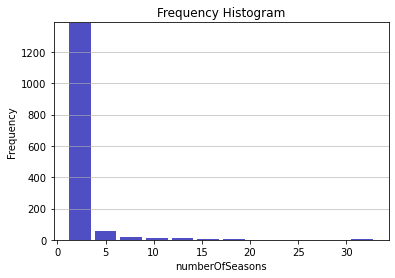

In [14]:
"""
8: Write a query that finds the number of seasons for each TV series. Using the results of the query create a histogram (frequency plot).
"""
#Query
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
con = con_db.cursor()
con.execute('''
    select parenttconst, COUNT(DISTINCT seasonNumber) as numberOfSeasons
    FROM title_episode
    GROUP BY parenttconst
''')
results = con.fetchall()
#print(results)
#Frequency Histogram
numberOfSeasons = []
for i in range(len(results)):
    numberOfSeasons.append(results[i][1])    
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=numberOfSeasons, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('numberOfSeasons')
plt.ylabel('Frequency')
plt.title('Frequency Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
con.close()

In [15]:
# Build a function in your code or a stored procedure in the database (approach is your choice) called addActor() that adds a new actor to the database: this requires updating several tables, so the insertions must occur within a transaction in order to function properly in a concurrent environment. Test your function by inserting a new actor -- you may make up a name and associated information. Show evidence  in your notebook that the actor was properly inserted.

def addActor(primaryName, birthYear, deathYear, primaryProfession):
    con = con_db.cursor()
    # insert into "name_basics" table
    query1 = """
            INSERT OR IGNORE INTO name_basics (nconst, primaryName, birthYear, deathYear)
            VALUES (?,?,?,?) 
            """
    # concate nconst id
    nconst_max = con.execute("SELECT MAX(nconst) FROM name_basics").fetchall()
    nconst_new = nconst_max[0][0][0:2] + str(int(nconst_max[0][0][2:])+1).zfill(7)
    data = (nconst_new, primaryName, birthYear, deathYear)
    con.execute(query1 , data)
    print(pd.read_sql_query("SELECT * FROM name_basics", con_db))
    # insert into "profession" table
    query2 = """
            INSERT OR IGNORE INTO profession (name)
            VALUES (?) 
            """
    profession_list = primaryProfession.split(",")
    for profession in profession_list:
        con.execute(query2 , tuple([profession]))
    print(pd.read_sql_query("SELECT * FROM profession", con_db))
    # insert into "name_profession" table
    query3 = """
        INSERT OR IGNORE INTO name_profession (nconst, name)
        VALUES (?,?) 
        """
    for profession in profession_list:
       con.execute(query3, tuple([nconst_new, profession]))
    print(pd.read_sql_query("SELECT * FROM name_profession", con_db))
    con.close()
addActor("Cecilia Li","1998/08/20","", "actor")

          nconst           primaryName   birthYear deathYear   age  \
0      nm0000001          Fred Astaire        1899      1987  88.0   
1      nm0000002         Lauren Bacall        1924      2014  90.0   
2      nm0000003       Brigitte Bardot        1934        \N  86.0   
3      nm0000004          John Belushi        1949      1982  33.0   
4      nm0000005        Ingmar Bergman        1918      2007  89.0   
...          ...                   ...         ...       ...   ...   
9996   nm0010171         Carlos Acosta          \N        \N   NaN   
9997   nm0010172  Carlos Acosta-Milian        1965        \N  55.0   
9998   nm0010173  Carmen Acosta Iraola          \N        \N   NaN   
9999   nm0010174       Casimiro Acosta          \N        \N   NaN   
10000  nm0010175            Cecilia Li  1998/08/20            22.0   

       numberOfMovies  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...            

In [16]:
# Checking if the actor we just inserted is in place, with age updated. Number of Movies was not updated because the actor hasn't participated in any movie yet.
print(pd.read_sql_query("SELECT * FROM name_basics WHERE primaryName = 'Cecilia Li'", con_db))

      nconst primaryName   birthYear deathYear  age numberOfMovies
0  nm0010175  Cecilia Li  1998/08/20             22           None


In [17]:
#  Build a function in your code or a stored procedure in the database (approach is your choice) called deleteActor() that removes an actor from the database: this requires updating several tables, so the deletions must occur within a transaction in order to function properly in a concurrent environment. Test your function by deleting a new actor inserted in (9) -- show evidence that the removal was successful.

def deleteActor(primaryName, birthYear, deathYear):
    con = con_db.cursor()
    # delete from name_basics
    data = (primaryName,birthYear, deathYear)
    nconst =  con.execute("SELECT nconst FROM name_basics WHERE primaryName = ? AND birthYear = ? AND deathYear = ?", data).fetchone()
    delete_name_basics = "DELETE FROM name_basics WHERE nconst = ? ;"
    con.execute(delete_name_basics, tuple(nconst))
    print(pd.read_sql_query("SELECT * FROM name_basics", con_db))
    
    # # delete from name_profession
    delete_name_profession = "DELETE FROM name_profession WHERE nconst = ?;"
    con.execute(delete_name_profession, tuple(nconst))
    print(pd.read_sql_query("SELECT * FROM name_profession", con_db))
    con.close()

deleteActor("Cecilia Li","1998/08/20", "")

         nconst           primaryName birthYear deathYear   age  \
0     nm0000001          Fred Astaire      1899      1987  88.0   
1     nm0000002         Lauren Bacall      1924      2014  90.0   
2     nm0000003       Brigitte Bardot      1934        \N  86.0   
3     nm0000004          John Belushi      1949      1982  33.0   
4     nm0000005        Ingmar Bergman      1918      2007  89.0   
...         ...                   ...       ...       ...   ...   
9995  nm0010170         Carlos Acosta      1937      2010  73.0   
9996  nm0010171         Carlos Acosta        \N        \N   NaN   
9997  nm0010172  Carlos Acosta-Milian      1965        \N  55.0   
9998  nm0010173  Carmen Acosta Iraola        \N        \N   NaN   
9999  nm0010174       Casimiro Acosta        \N        \N   NaN   

      numberOfMovies  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
9995             NaN  
9996       

In [18]:
# Checking if the actor was successfully removed.
print(pd.read_sql_query("SELECT * FROM name_basics WHERE primaryName = 'Cecilia Li'", con_db))

Empty DataFrame
Columns: [nconst, primaryName, birthYear, deathYear, age, numberOfMovies]
Index: []


In [19]:
"""
11: Write a query to retrieve the names and ages of all actors who appeared in more than two movies (ignore TV movies) 
    which an above average rating.
"""

con = con_db.cursor()
#Not sure what counts as a TV movie
#print(pd.read_sql_query("SELECT title_principals.tconst, title_ratings.averageRating, title_principals.category FROM title_principals INNER JOIN title_ratings ON title_principals.tconst = title_ratings.tconst WHERE title_ratings.tconst = 'tt0000677';", con_db))
#print(pd.read_sql_query("SELECT AVG(averageRating) FROM title_ratings;", con_db))
con.execute('''
                SELECT primaryName, age FROM
                                    (
                                    SELECT primaryName, age, title_principals.tconst FROM name_basics
                                    INNER JOIN title_principals ON name_basics.nconst = title_principals.nconst
                                    INNER JOIN title_ratings ON title_principals.tconst = title_ratings.tconst
                                    WHERE (title_principals.category = 'actor' OR title_principals.category = 'actress') AND title_ratings.averageRating > (SELECT AVG(averageRating) FROM title_ratings)
                                    )
                                    GROUP BY primaryName HAVING COUNT(primaryName) > 1;
            ''')
print(con.fetchall())
con.close()

[('Asta Nielsen', 91), ('D.W. Griffith', 73), ("Gilbert M. 'Broncho Billy' Anderson", 91), ('Harry Carey', 69), ('King Baggot', 69), ('Lionel Barrymore', 76), ('Maurice Costello', 73)]
